In [1]:
!pip install -q jupyter-dash==0.3.0rc1 dash-bootstrap-components transformers

     |████████████████████████████████| 51kB 3.3MB/s 
     |████████████████████████████████| 194kB 12.3MB/s 
     |████████████████████████████████| 2.3MB 14.0MB/s 
     |████████████████████████████████| 81kB 7.7MB/s 
     |████████████████████████████████| 3.3MB 32.4MB/s 
     |████████████████████████████████| 901kB 36.3MB/s 
     |████████████████████████████████| 1.0MB 33.6MB/s 
     |████████████████████████████████| 3.5MB 32.4MB/s 
     |████████████████████████████████| 92kB 8.5MB/s 
     |████████████████████████████████| 1.8MB 34.9MB/s 
     |████████████████████████████████| 358kB 38.9MB/s 


In [2]:
import time

import dash
import dash_html_components as html
import dash_core_components as dcc
import dash_bootstrap_components as dbc
from dash.dependencies import Input, Output, State
from jupyter_dash import JupyterDash
from transformers import AutoModelWithLMHead, AutoTokenizer
import torch

In [3]:
import numpy as np
import pandas as pd
#import dataprep.eda as dp
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact, Layout
import ipywidgets as widgets
import numpy as np
import pandas as pd
#import dataprep.eda as dp
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact, Layout
import ipywidgets as widgets
from plotly.subplots import make_subplots


In [ ]:
import plotly.express as px


In [4]:
df = pd.read_excel('Vacantes.xlsx')
df

,Num_mes,Año,Mes,Departamento,Experiencia_laboral,cant_exp
0,1,2015.0,Ene,Amazonas,Sin Experiencia,9
1,1,2015.0,Ene,Amazonas,1 a 6 Meses,0
2,1,2015.0,Ene,Amazonas,7 a 12 Meses,3
3,1,2015.0,Ene,Amazonas,13 a 24 Meses,2
4,1,2015.0,Ene,Amazonas,25 a 36 Meses,1
...,...,...,...,...,...,...
18475,10,2020.0,Oct,Vichada,13 a 24 Meses,6
18476,10,2020.0,Oct,Vichada,25 a 36 Meses,3
18477,10,2020.0,Oct,Vichada,37 a 60 Meses,0
18478,10,2020.0,Oct,Vichada,Mayor a 60 meses,0


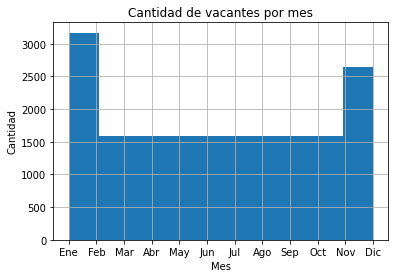

In [ ]:
df.Mes.hist()
plt.title('Cantidad de vacantes por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.savefig('hist_age')

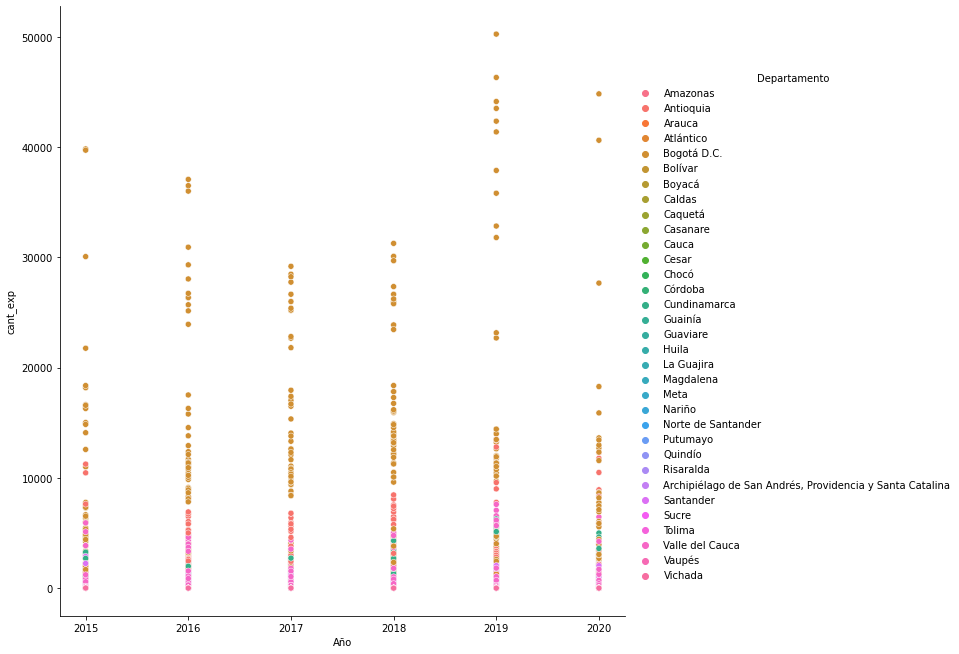

In [ ]:
sns.relplot(x="Año", y="cant_exp", height=9, hue='Departamento', data=df)

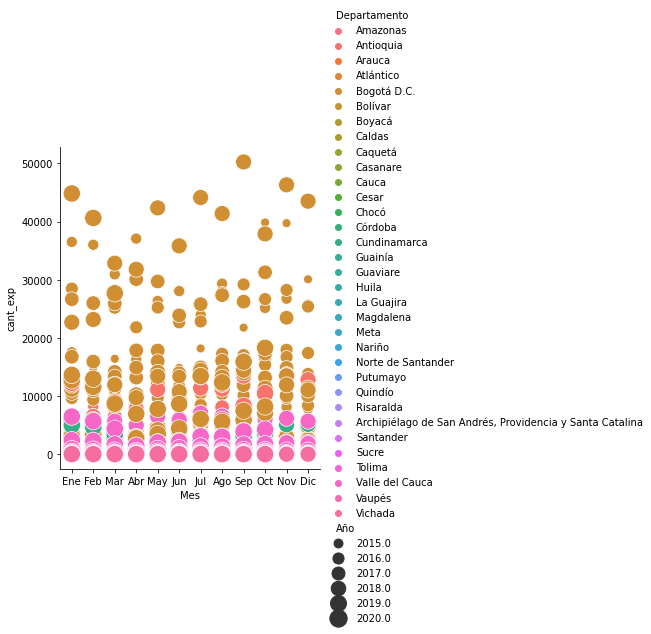

In [ ]:
sns.relplot(data=df, x='Mes', y='cant_exp', size='Año', sizes=(80, 300), hue='Departamento')

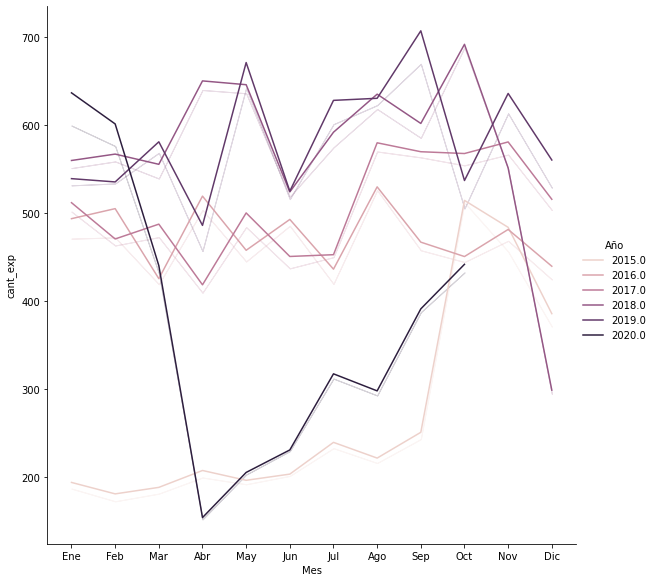

In [ ]:
sns.relplot(x="Mes", y="cant_exp", hue="Año", ci=False, height=8, kind='line',data=df)

In [ ]:
fig = px.pie(df, values='cant_exp', names='Experiencia_laboral', title='Tiempo de experiencia laboral')
fig.show()

In [ ]:
data = dict(
    number=[3343880, 1530085, 1218906, 1150857, 483539, 393024, 263929, 251153],
    stage=["7 a 12 meses", "Sin Experiencia", "13 a 24 meses", "No especifica experiencia", "25 a 36 meses", "Mayor a 60 meses", "37 a 60 meses", "1 a 6 meses"])
fig = px.funnel(data, x='number', y='stage')
fig.show()

In [ ]:
! pip install squarify

In [ ]:
import matplotlib.pyplot as plt
import squarify # pip install squarify
import pandas as pd

In [ ]:
fig = px.treemap(df, 
                 path=['Año', 'Mes'], 
                 values='cant_exp',
                 color='Departamento'
                )
fig.show()

TypeError: ignored

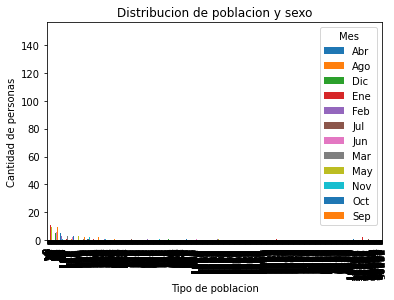

In [ ]:
#%matplotlib inline
#pd.crosstab(df.cant_exp,df.Mes).plot(kind='bar')
#plt.title('Distribucion de poblacion y sexo')
#plt.xlabel('Tipo de poblacion')
#plt.ylabel('Cantidad de personas')
#plt.savefig('purchase_fre_job')

In [ ]:
fig=px.bar(df, x=df.Año, y=df.cant_exp, facet_col=df.Departamento, color="Mes")
fig.show()

In [5]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
from jupyter_dash import JupyterDash

import pandas as pd

df = pd.read_excel('Vacantes.xlsx')

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div([
    html.H1("Cantidad de experienca por mes años 2015-2020"),
    dcc.Graph(id='graph-with-slider'),
    dcc.Slider(
        id='Año-slider',
        min=df['Año'].min(),
        max=df['Año'].max(),
        value=df['Año'].min(),
        marks={str(Año): str(Año) for Año in df['Año'].unique()},
        step=None
    )
])

@app.callback(
    Output('graph-with-slider', 'figure'),
    [Input('Año-slider', 'value')])
def actualiza(selected_Año):
    filtered_df = df[df.Año == selected_Año]

    fig = px.scatter(filtered_df, x="Mes", y="cant_exp", 
                     size="Año", color="Experiencia_laboral", hover_name="Departamento", 
                     log_x=False, size_max=15)

    fig.update_layout(transition_duration=1)

    return fig


In [6]:
df = pd.read_excel('Vacantes.xlsx')

available_indicators = df['Experiencia_laboral'].unique()
app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div([
    html.Div([

        html.Div([
            dcc.Dropdown(
                id='crossfilter-xaxis-column',
                options=[{'label': i, 'value': i} for i in available_indicators],
                value='Sin Experiencia'
            ),
            dcc.RadioItems(
                id='crossfilter-xaxis-type',
                options=[{'label': i, 'value': i} for i in ['Linear', 'Log']],
                value='Linear',
                labelStyle={'display': 'inline-block'}
            )
        ],
        style={'width': '49%', 'display': 'inline-block'}),

        html.Div([
            dcc.Dropdown(
                id='crossfilter-yaxis-column',
                options=[{'label': i, 'value': i} for i in available_indicators],
                value='1 a 6 Meses'
            ),
            dcc.RadioItems(
                id='crossfilter-yaxis-type',
                options=[{'label': i, 'value': i} for i in ['Linear', 'Log']],
                value='Linear',
                labelStyle={'display': 'inline-block'}
            )
        ], style={'width': '49%', 'float': 'right', 'display': 'inline-block'})
    ], style={
        'borderBottom': 'thin lightgrey solid',
        'backgroundColor': 'rgb(250, 250, 250)',
        'padding': '10px 5px'
    }),

    html.Div([
        dcc.Graph(
            id='crossfilter-indicator-scatter',
            hoverData={'points': [{'customdata': 'Japan'}]}
        )
    ], style={'width': '49%', 'display': 'inline-block', 'padding': '0 20'}),
    html.Div([
        dcc.Graph(id='x-time-series'),
        dcc.Graph(id='y-time-series'),
    ], style={'display': 'inline-block', 'width': '49%'}),

    html.Div(dcc.Slider(
        id='crossfilter-Año--slider',
        min=df['Año'].min(),
        max=df['Año'].max(),
        value=df['Año'].max(),
        marks={str(Año): str(Año) for Año in df['Año'].unique()},
        step=None
    ), style={'width': '49%', 'padding': '0px 20px 20px 20px'})
])


@app.callback(
    dash.dependencies.Output('crossfilter-indicator-scatter', 'figure'),
    [dash.dependencies.Input('crossfilter-xaxis-column', 'value'),
     dash.dependencies.Input('crossfilter-yaxis-column', 'value'),
     dash.dependencies.Input('crossfilter-xaxis-type', 'value'),
     dash.dependencies.Input('crossfilter-yaxis-type', 'value'),
     dash.dependencies.Input('crossfilter-Año--slider', 'value')])
def update_graph(xaxis_column_name, yaxis_column_name,
                 xaxis_type, yaxis_type,
                 Año_value):
    dff = df[df['Año'] == Año_value]

    return {
        'data': [dict(
            x=dff[dff['Experiencia_laboral'] == xaxis_column_name]['cant_exp'],
            y=dff[dff['Experiencia_laboral'] == yaxis_column_name]['cant_exp'],
            text=dff[dff['Experiencia_laboral'] == yaxis_column_name]['Departamento'],
            customdata=dff[dff['Experiencia_laboral'] == yaxis_column_name]['Departamento'],
            mode='markers',
            marker={
                'size': 10,
                'opacity': 0.7,
                'color': 'orange',
                'line': {'width': 2, 'color': 'black'}
            }
        )],
        'layout': dict(
            xaxis={
                'title': xaxis_column_name,
                'type': 'linear' if xaxis_type == 'Linear' else 'log'
            },
            yaxis={
                'title': yaxis_column_name,
                'type': 'linear' if yaxis_type == 'Linear' else 'log'
            },
            margin={'l': 40, 'b': 30, 't': 10, 'r': 0},
            height=450,
            hovermode='closest'
        )
    }


def create_time_series(dff, axis_type, title):
    return {
        'data': [dict(
            x=dff['Año'],
            y=dff['cant_exp'],
            mode='lines+markers'
        )],
        'layout': {
            'height': 225,
            'margin': {'l': 20, 'b': 30, 'r': 10, 't': 10},
            'annotations': [{
                'x': 0, 'y': 0.85, 'xanchor': 'left', 'yanchor': 'bottom',
                'xref': 'paper', 'yref': 'paper', 'showarrow': False,
                'align': 'left', 'bgcolor': 'rgba(255, 255, 255, 0.5)',
                'text': title
            }],
            'yaxis': {'type': 'linear' if axis_type == 'Linear' else 'log'},
            'xaxis': {'showgrid': False}
        }
    }


@app.callback(
    dash.dependencies.Output('x-time-series', 'figure'),
    [dash.dependencies.Input('crossfilter-indicator-scatter', 'hoverData'),
     dash.dependencies.Input('crossfilter-xaxis-column', 'value'),
     dash.dependencies.Input('crossfilter-xaxis-type', 'value')])
def update_y_timeseries(hoverData, xaxis_column_name, axis_type):
    country_name = hoverData['points'][0]['customdata']
    dff = df[df['Departamento'] == country_name]
    dff = dff[dff['Experiencia_laboral'] == xaxis_column_name]
    title = '<b>{}</b><br>{}'.format(country_name, xaxis_column_name)
    return create_time_series(dff, axis_type, title)


@app.callback(
    dash.dependencies.Output('y-time-series', 'figure'),
    [dash.dependencies.Input('crossfilter-indicator-scatter', 'hoverData'),
     dash.dependencies.Input('crossfilter-yaxis-column', 'value'),
     dash.dependencies.Input('crossfilter-yaxis-type', 'value')])
def update_x_timeseries(hoverData, yaxis_column_name, axis_type):
    dff = df[df['Departamento'] == hoverData['points'][0]['customdata']]
    dff = dff[dff['Experiencia_laboral'] == yaxis_column_name]
    return create_time_series(dff, axis_type, yaxis_column_name)

In [8]:
app.run_server(debug=True,port=(8000))

Dash app running on:


<IPython.core.display.Javascript object>